<a href="https://colab.research.google.com/github/GuilleC1987/Tarea1_AIML/blob/main/proyectoPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
!pip install ydata-profiling -q
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Link kaggle goodreadsbooks data set https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks
# Se utiliza el parámetros encoding para evitar error de interpretación al momento de que python lea el archivo y encuentre caracteres especiales.
# Se utiliza el parámetros on_bad_lines para saltar lineas del archivo original en donde se tienen valores fuera de las columnas originales de la tabla.

df_books = pd.read_csv('books.csv', encoding="latin1", on_bad_lines='warn')
df_books.head()

/tmp/ipython-input-43-3072361308.py:5: ParserWarning: Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13

  df_books = pd.read_csv('books.csv', encoding="latin1", on_bad_lines='warn')


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [44]:
#Haciendo uso de shape se obtiene el número de filas y columnas en el data set,
df_books.shape

(11123, 12)

In [45]:
#A través de la funcion info se identifica el tipo de dato en cada columna,
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [46]:
#Ejecutando la siguiente linea de código se da formato a los valores arrojados por pandas, con el fin de obtener valores tipo float con dos decimales. En un primer intento se obtuvo resultados con
# el formato por default en notación cientifica.
pd.set_option('display.float_format', '{:.2f}'.format)

In [31]:
df_books.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bookID,11123.00,21310.86,13094.73,1.00,10277.50,20287.00,32104.50,45641.00
average_rating,11123.00,3.93,0.35,0.00,3.77,3.96,4.14,5.00
isbn13,11123.00,9759880247639.15,442975846058.35,8987059752.00,9780345453803.50,9780582461536.00,9780872208045.50,9790007672386.00
num_pages,11123.00,336.41,241.15,0.00,192.00,299.00,416.00,6576.00
ratings_count,11123.00,17942.85,112499.15,0.00,104.00,745.00,5000.50,4597666.00
text_reviews_count,11123.00,542.05,2576.62,0.00,9.00,47.00,238.00,94265.00


Al análisar el resultado de la función describe se puede concluir lo siguiente del dataframe books:
- En el data set la mayoría de libros tienen una buena calificación, la media del averga_raiting es 3.93 y el 75% de los libros han sido calificados con raitings superiores a 3.77.
- Adicionalmente, se puede concluir que la mayoría de libros son extensos en su número de páginas, la media es de 336 y casi el 75% de los libros son más extensos a 200 páginas.
- En las siguientes secciones de este notebook se identificará el libro con mayor número de páginas.
- Además, para la columna num_pages, se observa que el mínimo valor es cero, lo cual no tiene mucho sentido. Se contabilizaran e identificar estos caso para determinar si puede alterar o ensuciar los resultados posteriores.
- Finalmente, se identifican libros sin raiting_counts y text_reviews_count, lo cual es factible.


In [32]:
#En la base al resultado de la linea anterior, se desea identificar el nombre del libro más extenso, el cual según resultado tiene 6576 páginas.
#En un primer intento, al ejecutar el filtrado de la fila se obtuvo un error, ya que la columna en el dataset original tiene un espacio al inicio del nombre,
#el cual se eliminó haciendo uso de la función srt.strip.
df_books.columns = df_books.columns.str.strip()
df_books[df_books['num_pages']==6576]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company


In [33]:
#Se contabiliza el número de libros con cero como valor en num_pages
len(list(df_books[df_books['num_pages']==0]['title']))

76

In [36]:
# Se identifican 76 libros cuyo valor num_pages es igual a cero. Muy probablemente el creador del data set goodreadsbooks hizo el reemplazo de valores nulos por ceros.
# Dejo constancia y link de kaggle en donde obtuve el dataset para comprobación de la limpieza efectuada por el creador.
# Sin embargo, debido a la gran cantidad de filas en el data set (11123.00), reemplazar por ceros el valor de num_pages en 76 filas no tendrá mayor efecto distorcionador en los resultados
#del EDA y análisis siguientes.
list(df_books[df_books['num_pages']==0]['title'])

['The 5 Love Languages / The 5 Love Languages Journal',
 "The Tragedy of Pudd'nhead Wilson",
 'Murder by Moonlight & Other Mysteries (New Adventures of Sherlock Holmes 19-24)',
 'The Unfortunate Tobacconist & Other Mysteries (Sherlock Holmes 1-6)',
 'The Da Vinci Code (Robert Langdon  #2)',
 'The Summons / The Brethren',
 'The Patricia Cornwell CD Audio Treasury: All That Remains / Cruel & Unusual (Kay Scarpetta  #3  #4)',
 'Like Water for Chocolate',
 "A Study Guide to Gabriel Garcia Marquez' One Hundred Years of Solitude",
 'The Michael Crichton Collection: Airframe / The Lost World / Timeline',
 "Gulliver's Travels",
 'Return to the Planet of the Apes #2: Escape from Terror Lagoon',
 'The Complete Science Fiction Treasury of H.G. Wells',
 'Blind Willow  Sleeping Woman: 24 Stories',
 'Der Prozess',
 'Clockwork (Cover to Cover)',
 'The Far Pavilions',
 'Gray Matter and Other Stories from Night Shift',
 'The Shining',
 'The Celestine Prophecy',
 'A Clash of Kings (A Song of Ice and Fir

In [8]:
#Se ejecuta ProfileReport de ydata_profiling para completar el EDA
report = ProfileReport(df_books)
report.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:00<00:00, 15.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Se corrobora que el data set no tiene null values.
df_books.isnull().sum()

,0
bookID,0
title,0
authors,0
average_rating,0
isbn,0
isbn13,0
language_code,0
num_pages,0
ratings_count,0
text_reviews_count,0


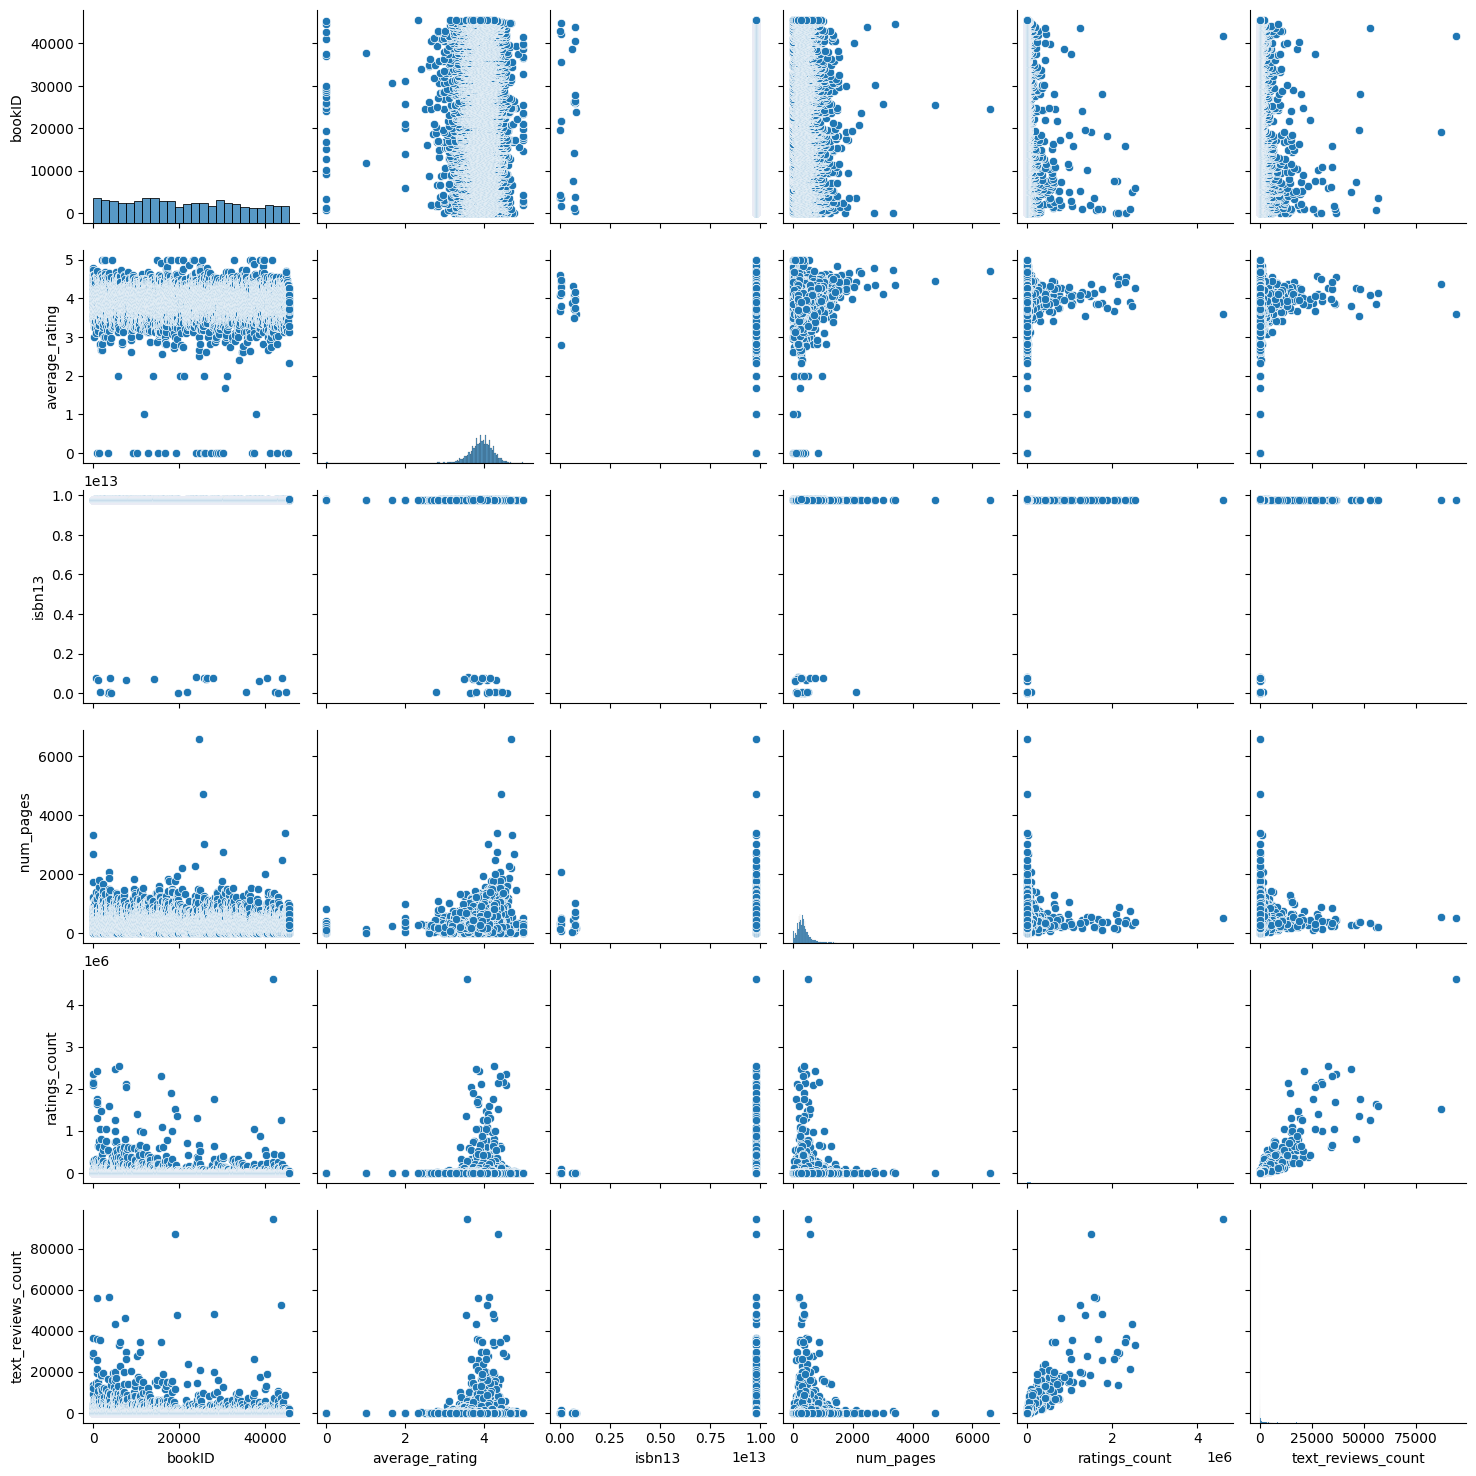

In [10]:
sns.pairplot(df_books);

De los graficos anteriores el análisis se centrará en average_rating,  num_pages, ratings_count y text_reviews_count, ya que el resto de campos númericos identificadores.

- En general, los libros del data set están bien calificados, con un average_rating entre 3 y 5. Unicamente casos bien particulares están fuera de este rango.
- Además, se observa en el análisis descriptivo y en el gráfico que la mayoria de los libros han sido calificados por al menos por 100 lectores. Es decir, que se tiene una buena cantidad de datos para concluir que los libros en su mayoría son buenos libros.
- Revisando la relación entre average_rating y text_reviews_count, se observa que, si bien es cierto se tienen altos valores de average_rating, una menor cantidad de personas han dejado sus comentarios. Los lectores tienden a obviar esta sección.